# Phase 4



Unsupervised ML (Clustering)



Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 words.



In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [108]:
#Importing 1st file-

In [109]:
df=pd.read_csv(r"C:\Users\prate\Desktop\New folder\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [110]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [111]:
df=df[df['DISTRICT']!='TOTAL']
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [112]:
df=df[['STATE/UT','DISTRICT','YEAR','TOTAL IPC CRIMES']]
df

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9010,DELHI UT,STF,2012,6
9011,DELHI UT,WEST,2012,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787


In [113]:
#Importing second file-

In [114]:
df1=pd.read_csv(r"C:\Users\prate\Desktop\New folder\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [115]:
#Removing total row from the data set-

In [116]:
df1=df1[df1['DISTRICT']!='TOTAL']
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0


In [117]:
df1['Total crimes against SC']=df1.iloc[:,3:].sum(axis=1)

In [118]:
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total crimes against SC
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32,55
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53,127
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34,114
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0,1


In [119]:
df1=df1[['STATE/UT','DISTRICT','Year','Total crimes against SC']]
df1

,STATE/UT,DISTRICT,Year,Total crimes against SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


In [120]:
#Importing third file-

In [121]:
df2=pd.read_csv(r"C:\Users\prate\Desktop\New folder\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [122]:
df2=df2[df2['DISTRICT']!='TOTAL']
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0


In [123]:
df2['Total crimes against ST']=df2.iloc[:,3:].sum(axis=1)

In [124]:
df2

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs,Total crimes against ST
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13,18
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6,14
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0,2
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,0,0,0,0,0,0,0,0,0,0,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0,0


In [125]:
df2=df2[['STATE/UT','DISTRICT','Year','Total crimes against ST']]
df2

,STATE/UT,DISTRICT,Year,Total crimes against ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


In [126]:
#Importing 4th file-

In [127]:
df3=pd.read_csv(r"C:\Users\prate\Desktop\New folder\03_District_wise_crimes_committed_against_children_2001_2012.csv")
df3

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [128]:
df3=df3[df3['DISTRICT']!='TOTAL']
df3

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,DELHI,STF,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9008,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7


In [129]:
df3.rename(columns={'Total':'Total crime against children'},inplace=True)

In [130]:
df3

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total crime against children
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9007,DELHI,STF,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9008,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7


In [131]:
df3=df3[['STATE/UT','DISTRICT','Year','Total crime against children']]
df3

,STATE/UT,DISTRICT,Year,Total crime against children
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


In [132]:
#Importing fifth file-

In [133]:
df4=pd.read_csv(r"C:\Users\prate\Desktop\New folder\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df4

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [134]:
df4=df4[df4['DISTRICT']!='TOTAL']
df4

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,79,256,18,53,6,327,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0


In [135]:
df4['Total crimes against women']=df4.iloc[:,3:].sum(axis=1)

In [136]:
df4

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475
...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,0,0,0,0,0,0,0
9011,DELHI,WEST,2012,79,256,18,53,6,327,0,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0,2
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0,11


In [137]:
df4=df4[['STATE/UT','DISTRICT','Year','Total crimes against women']]
df4

,STATE/UT,DISTRICT,Year,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


In [138]:
cluster=pd.merge(df,df1,how='inner',left_on=['STATE/UT','DISTRICT','YEAR'],right_on=['STATE/UT','DISTRICT','Year']).merge(df2,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(df3,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year']).merge(df4,how='inner',left_on=['STATE/UT','DISTRICT','Year'],right_on=['STATE/UT','DISTRICT','Year'])

In [139]:
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Year,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,ANDHRA PRADESH,ADILABAD,2001,4154,2001,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,2001,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,5818,2001,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,2001,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,2001,89,14,0,475
...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,202,2012,0,0,7,6
8405,DAMAN & DIU,DIU,2012,37,2012,0,0,1,2
8406,LAKSHADWEEP,LAKSHADWEEP,2012,60,2012,0,0,0,2
8407,PUDUCHERRY,KARAIKAL,2012,787,2012,1,0,7,11


In [140]:
cluster=cluster.groupby(['STATE/UT','DISTRICT']).sum().reset_index()
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Year,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,A & N ISLANDS,A and N ISLANDS,2007,807,2007,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,7377,20059,0,33,206,458
2,A & N ISLANDS,CAR,2012,24,2012,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,20059,0,3,1,11
4,A & N ISLANDS,NORTH,2012,115,2012,0,0,7,9
...,...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,24078,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,24078,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,24078,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,2012,3023,2012,0,8,44,552


In [141]:
cluster=cluster.drop(columns=['YEAR'],axis=1)
cluster

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Year,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,A & N ISLANDS,A and N ISLANDS,807,2007,0,1,10,54
1,A & N ISLANDS,ANDAMAN,7377,20059,0,33,206,458
2,A & N ISLANDS,CAR,24,2012,0,0,2,2
3,A & N ISLANDS,NICOBAR,235,20059,0,3,1,11
4,A & N ISLANDS,NORTH,115,2012,0,0,7,9
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,16958,24078,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,4746,24078,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,1760,24078,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,3023,2012,0,8,44,552


In [142]:
cluster=cluster.drop(columns=['Year'],axis=1)
cluster

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,A & N ISLANDS,A and N ISLANDS,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,7377,0,33,206,458
2,A & N ISLANDS,CAR,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,235,0,3,1,11
4,A & N ISLANDS,NORTH,115,0,0,7,9
...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,3023,0,8,44,552


# 

# 4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"

In [143]:
df=cluster.iloc[:,2:]
df

,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,807,0,1,10,54
1,7377,0,33,206,458
2,24,0,0,2,2
3,235,0,3,1,11
4,115,0,0,7,9
...,...,...,...,...,...
796,16958,8,9,8,3180
797,4746,0,0,2,134
798,1760,0,1,7,61
799,3023,0,8,44,552


In [144]:
from sklearn.cluster import KMeans

In [145]:
kmean=KMeans(n_clusters=3,random_state=10)

In [146]:
y_kmeans=kmean.fit_predict(df)

# 

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

# REGION 1) Moderate area'

In [147]:
moderate_area=cluster[y_kmeans==0]
moderate_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
0,A & N ISLANDS,A and N ISLANDS,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,7377,0,33,206,458
2,A & N ISLANDS,CAR,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,235,0,3,1,11
4,A & N ISLANDS,NORTH,115,0,0,7,9
...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,3023,0,8,44,552


In [148]:
moderate_area['Total crime']=moderate_area.iloc[:,2:].sum(axis=1)

In [149]:
moderate_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
0,A & N ISLANDS,A and N ISLANDS,807,0,1,10,54,872
1,A & N ISLANDS,ANDAMAN,7377,0,33,206,458,8074
2,A & N ISLANDS,CAR,24,0,0,2,2,28
3,A & N ISLANDS,NICOBAR,235,0,3,1,11,250
4,A & N ISLANDS,NORTH,115,0,0,7,9,131
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,16958,8,9,8,3180,20163
797,WEST BENGAL,SEALDAH G.R.P.,4746,0,0,2,134,4882
798,WEST BENGAL,SILIGURI G.R.P.,1760,0,1,7,61,1829
799,WEST BENGAL,SILIGURI_PC,3023,0,8,44,552,3627


# REGION 2) Sensative Area's

In [181]:
sensative_area=cluster[y_kmeans==1]

In [182]:
sensative_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
6,ANDHRA PRADESH,ADILABAD,61959,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,59927,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,75471,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,58147,1537,128,574,5002
11,ANDHRA PRADESH,EAST GODAVARI,93193,2042,223,213,9514
...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,35343,6,15,237,7811
792,WEST BENGAL,MURSHIDABAD,85689,13,13,923,27004
793,WEST BENGAL,NADIA,79313,0,1,94,17582
794,WEST BENGAL,PASCHIM MIDNAPUR,38981,6,11,29,7875


In [183]:
sensative_area['Total crime']=sensative_area.iloc[:,2:].sum(axis=1)

In [184]:
sensative_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
6,ANDHRA PRADESH,ADILABAD,61959,686,269,269,8583,71766
7,ANDHRA PRADESH,ANANTAPUR,59927,1569,371,402,5287,67556
8,ANDHRA PRADESH,CHITTOOR,75471,1393,14,345,8004,85227
9,ANDHRA PRADESH,CUDDAPAH,58147,1537,128,574,5002,65388
11,ANDHRA PRADESH,EAST GODAVARI,93193,2042,223,213,9514,105185
...,...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,35343,6,15,237,7811,43412
792,WEST BENGAL,MURSHIDABAD,85689,13,13,923,27004,113642
793,WEST BENGAL,NADIA,79313,0,1,94,17582,96990
794,WEST BENGAL,PASCHIM MIDNAPUR,38981,6,11,29,7875,46902


# REGION 3) Peaceful Area's

In [154]:
peaceful_area=cluster[y_kmeans==2]

In [155]:
peaceful_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women
10,ANDHRA PRADESH,CYBERABAD,141743,1657,341,296,15411
15,ANDHRA PRADESH,HYDERABAD CITY,202931,1293,76,872,19685
121,BIHAR,PATNA,147542,1503,33,893,5931
168,GUJARAT,AHMEDABAD COMMR.,218005,798,41,1435,14973
304,KARNATAKA,BANGALORE COMMR.,350347,1423,16,675,9010
342,KERALA,ERNAKULAM RURAL,114393,299,14,269,3072
372,MADHYA PRADESH,BHOPAL,169575,1565,226,1326,7087
383,MADHYA PRADESH,GWALIOR,111206,2310,595,1582,5760
386,MADHYA PRADESH,INDORE,204398,1139,421,4401,10392
388,MADHYA PRADESH,JABALPUR,119446,952,649,1203,7855


In [156]:
peaceful_area.shape

(18, 7)

In [157]:
peaceful_area['Total crime']=peaceful_area.iloc[:,2:].sum(axis=1)

In [158]:
peaceful_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
10,ANDHRA PRADESH,CYBERABAD,141743,1657,341,296,15411,159448
15,ANDHRA PRADESH,HYDERABAD CITY,202931,1293,76,872,19685,224857
121,BIHAR,PATNA,147542,1503,33,893,5931,155902
168,GUJARAT,AHMEDABAD COMMR.,218005,798,41,1435,14973,235252
304,KARNATAKA,BANGALORE COMMR.,350347,1423,16,675,9010,361471
342,KERALA,ERNAKULAM RURAL,114393,299,14,269,3072,118047
372,MADHYA PRADESH,BHOPAL,169575,1565,226,1326,7087,179779
383,MADHYA PRADESH,GWALIOR,111206,2310,595,1582,5760,121453
386,MADHYA PRADESH,INDORE,204398,1139,421,4401,10392,220751
388,MADHYA PRADESH,JABALPUR,119446,952,649,1203,7855,130105


In [159]:
peaceful_area['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'BIHAR', 'GUJARAT', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'TAMIL NADU', 'UTTAR PRADESH',
       'WEST BENGAL'], dtype=object)

# Analysis of clusters-

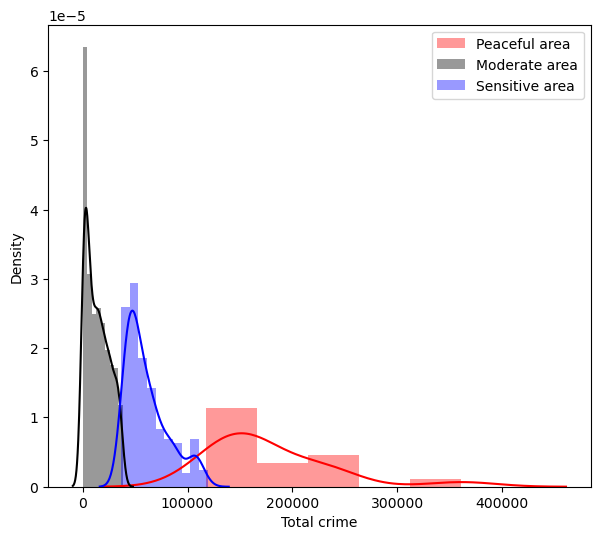

In [160]:
plt.figure(figsize=(7,6))
sns.distplot(peaceful_area['Total crime'],color='Red',label='Peaceful area')
sns.distplot(moderate_area['Total crime'],color='Black',label='Moderate area')
sns.distplot(sensative_area['Total crime'],color='Blue',label='Sensitive area')
plt.legend()
plt.show()

In [161]:
peaceful_area['Total crime'].sum()

3210348

In [162]:
sensative_area['Total crime'].sum()

15128219

In [163]:
moderate_area['Total crime'].sum()

7586819

# Conclusion-

1. So here we can notice that sensative area have the highest total crimes represented by blue line in the above graph.
2. Peaceful area has the lowest total crimes represented by red line in the above graph.
3. Moderate area has the moderate total crimes represented by black line.

In [164]:
#Checking cluster center-

In [165]:
kmean.cluster_centers_

array([[1.25440522e+04, 2.25610075e+02, 5.18395522e+01, 1.35888060e+02,
        1.19712313e+03],
       [5.49630526e+04, 9.42214575e+02, 1.58348178e+02, 4.95979757e+02,
        4.68825506e+03],
       [1.64945778e+05, 8.91388889e+02, 1.37333333e+02, 1.40872222e+03,
        1.09694444e+04]])

# Model Evalution-

In [166]:
from sklearn.metrics import silhouette_score

In [167]:
silhouette_score(df,y_kmeans)

0.622595828502409

So here we can see that my silhouette score is 62% which looks decent.

In [168]:
sensative_area=sensative_area.groupby('STATE/UT').sum().reset_index().sort_values(by='Total crime')

In [169]:
sensative_area

,STATE/UT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
14,PUNJAB,36285,85,0,295,2657,39322
3,CHANDIGARH,40807,11,0,753,2121,43692
7,JAMMU & KASHMIR,77184,3,0,1,7834,85022
13,ODISHA,122972,3621,404,176,11795,138968
8,JHARKHAND,130939,1099,919,285,7605,140847
6,HARYANA,199697,925,0,2337,17789,220748
4,CHHATTISGARH,250717,2536,1498,5975,17959,278685
1,ASSAM,245330,423,262,1111,37812,284938
18,WEST BENGAL,483205,131,86,1791,103606,588819
2,BIHAR,687009,19985,197,5168,42086,754445


In [170]:
# Highly sensative states-

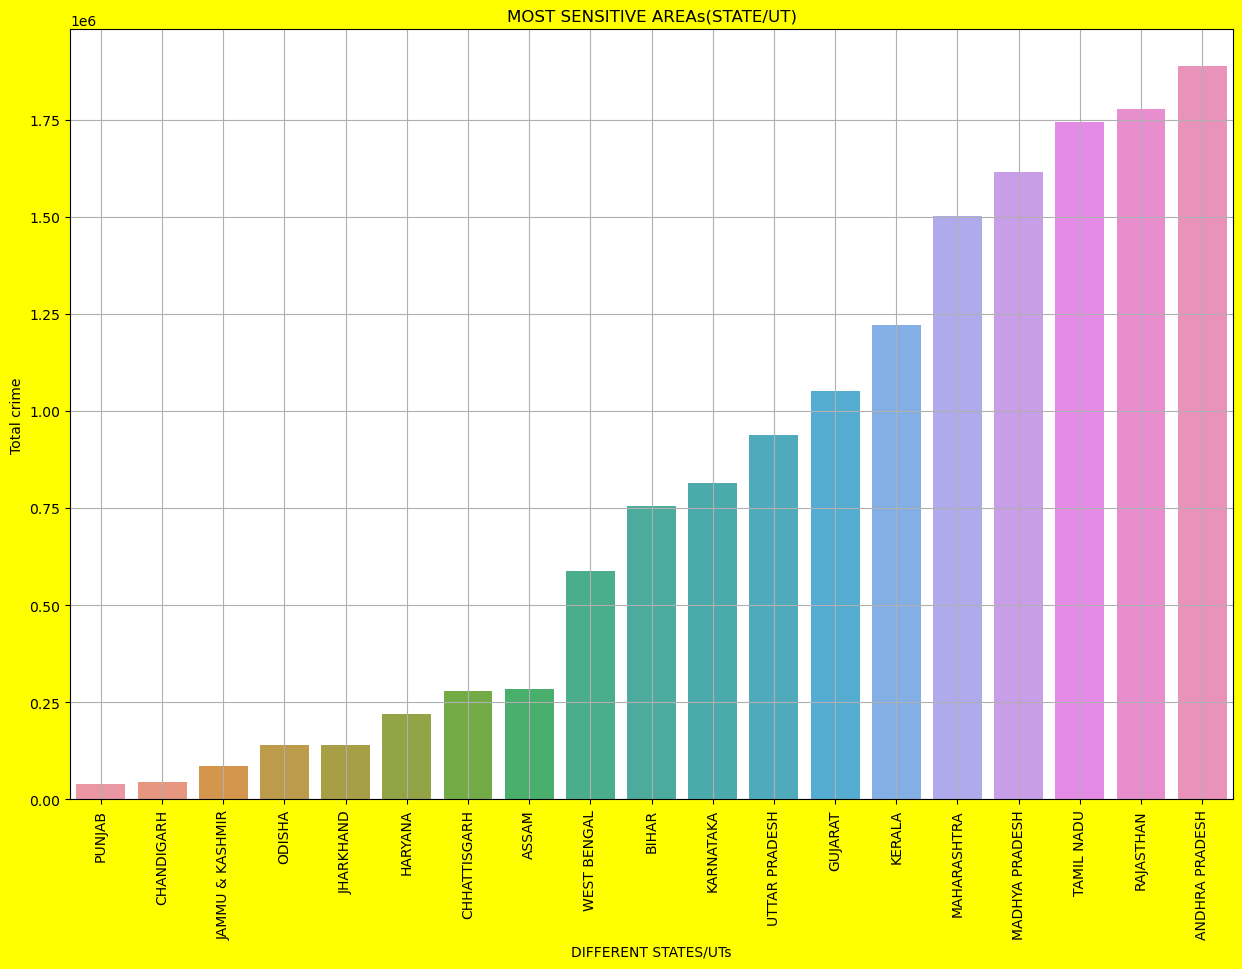

In [171]:
plt.figure(figsize=(15,10),facecolor='Yellow')
sns.barplot(x=sensative_area['STATE/UT'],y=sensative_area['Total crime'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST SENSITIVE AREAs(STATE/UT)")
plt.grid()
plt.show()

# Conclusion-

1. Here it can be noted that Andhra pradesh has the highest total crimes.
2. Punjab has the lowest total crimes.

# 

# 4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

In [172]:
sensative_area

,STATE/UT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
14,PUNJAB,36285,85,0,295,2657,39322
3,CHANDIGARH,40807,11,0,753,2121,43692
7,JAMMU & KASHMIR,77184,3,0,1,7834,85022
13,ODISHA,122972,3621,404,176,11795,138968
8,JHARKHAND,130939,1099,919,285,7605,140847
6,HARYANA,199697,925,0,2337,17789,220748
4,CHHATTISGARH,250717,2536,1498,5975,17959,278685
1,ASSAM,245330,423,262,1111,37812,284938
18,WEST BENGAL,483205,131,86,1791,103606,588819
2,BIHAR,687009,19985,197,5168,42086,754445


# 4.3.1 What is impacting more crimes in sensitive areas?

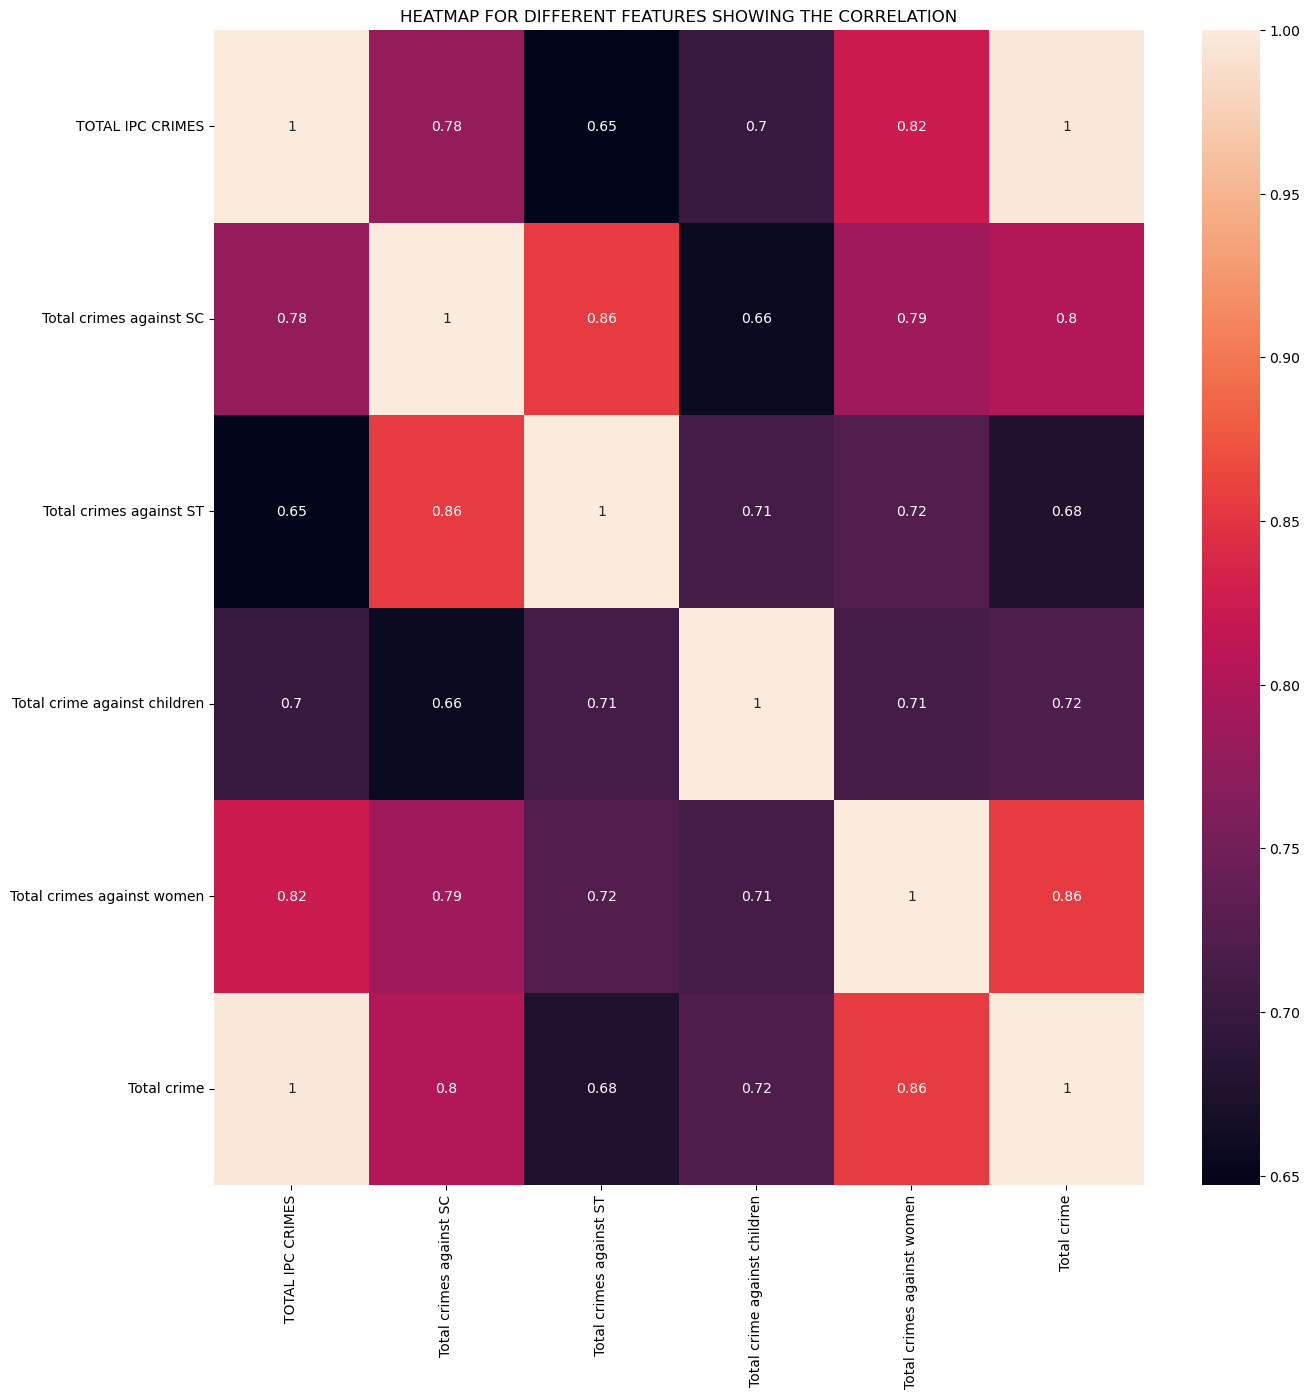

In [173]:
plt.figure(figsize=(15,15))
sns.heatmap(sensative_area.corr(),annot=True)
plt.title("HEATMAP FOR DIFFERENT FEATURES SHOWING THE CORRELATION")
plt.show()

# Conclusion-

1. Total crimes against SC is 80% correlated with total crimes.
2. Total crimes against ST is 68% correlated with Total crime.
3. Total crimes against children is 72% correlated with total crime.
4. Total crimes against women is 86% correlated with total crime.

# 4.3 Most safe and unsafe districts

In [174]:
peaceful_area

,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
10,ANDHRA PRADESH,CYBERABAD,141743,1657,341,296,15411,159448
15,ANDHRA PRADESH,HYDERABAD CITY,202931,1293,76,872,19685,224857
121,BIHAR,PATNA,147542,1503,33,893,5931,155902
168,GUJARAT,AHMEDABAD COMMR.,218005,798,41,1435,14973,235252
304,KARNATAKA,BANGALORE COMMR.,350347,1423,16,675,9010,361471
342,KERALA,ERNAKULAM RURAL,114393,299,14,269,3072,118047
372,MADHYA PRADESH,BHOPAL,169575,1565,226,1326,7087,179779
383,MADHYA PRADESH,GWALIOR,111206,2310,595,1582,5760,121453
386,MADHYA PRADESH,INDORE,204398,1139,421,4401,10392,220751
388,MADHYA PRADESH,JABALPUR,119446,952,649,1203,7855,130105


In [175]:
peaceful_area=peaceful_area.groupby('DISTRICT').sum().reset_index().sort_values(by='Total crime')
peaceful_area

,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
7,ERNAKULAM RURAL,114393,299,14,269,3072,118047
8,GWALIOR,111206,2310,595,1582,5760,121453
11,JABALPUR,119446,952,649,1203,7855,130105
13,LUCKNOW,118377,2482,22,1251,12679,134811
1,24 PARGANAS SOUTH,120912,7,0,238,25115,146272
14,MUMBAI,141815,67,2,1021,4251,147156
0,24 PARGANAS NORTH,122795,22,21,1435,24376,148649
17,PUNE COMMR.,139973,193,3,3391,6283,149843
16,PATNA,147542,1503,33,893,5931,155902
6,CYBERABAD,141743,1657,341,296,15411,159448


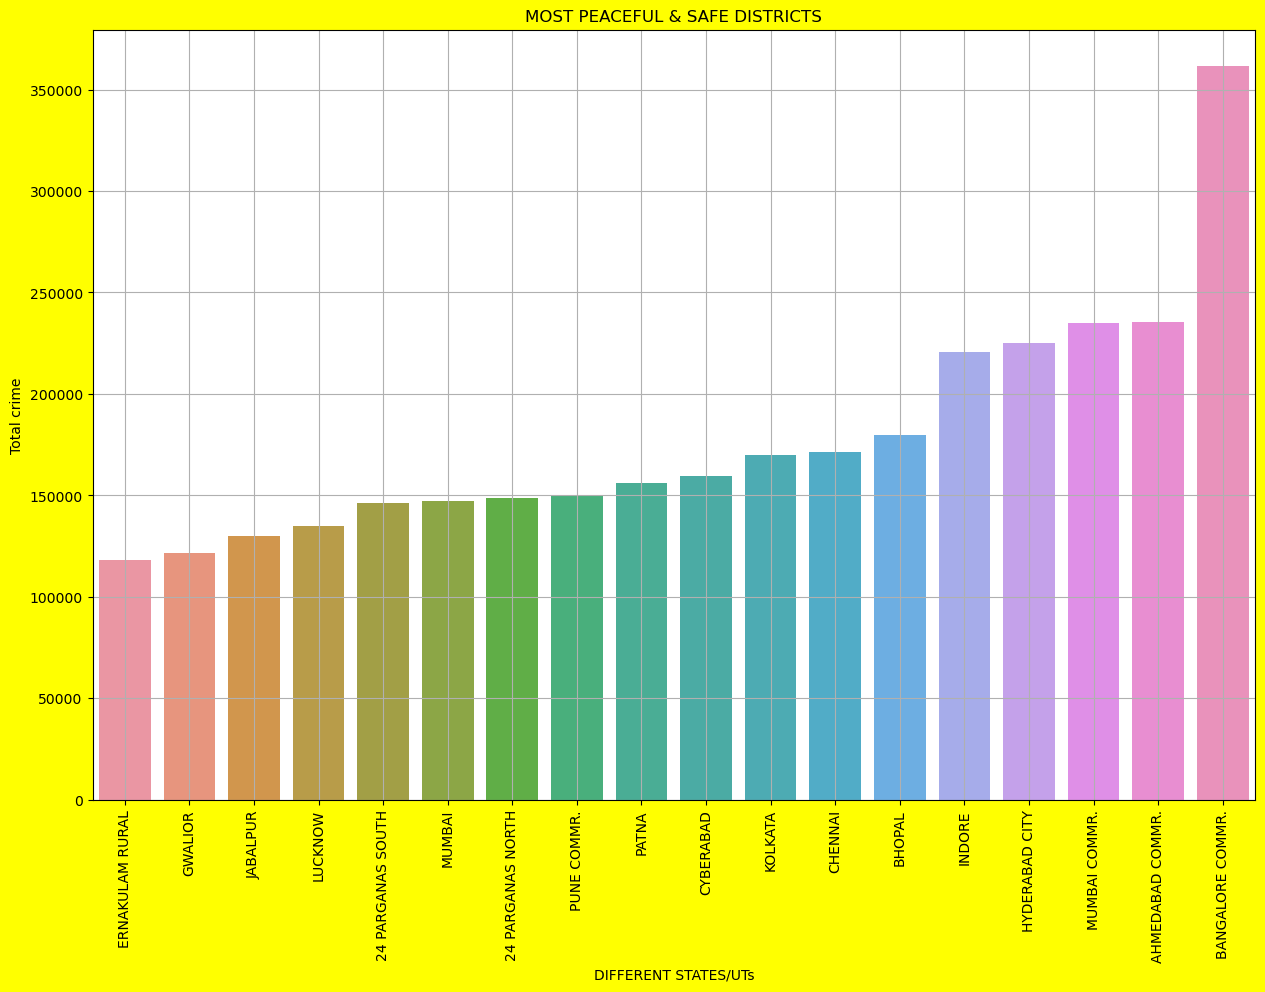

In [176]:
plt.figure(figsize=(15,10),facecolor='Yellow')
sns.barplot(x=peaceful_area['DISTRICT'],y=peaceful_area['Total crime'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST PEACEFUL & SAFE DISTRICTS")
plt.grid()
plt.show()

In [177]:
# Top 10 most unsafe districts-

In [178]:
sensative_area

,STATE/UT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
14,PUNJAB,36285,85,0,295,2657,39322
3,CHANDIGARH,40807,11,0,753,2121,43692
7,JAMMU & KASHMIR,77184,3,0,1,7834,85022
13,ODISHA,122972,3621,404,176,11795,138968
8,JHARKHAND,130939,1099,919,285,7605,140847
6,HARYANA,199697,925,0,2337,17789,220748
4,CHHATTISGARH,250717,2536,1498,5975,17959,278685
1,ASSAM,245330,423,262,1111,37812,284938
18,WEST BENGAL,483205,131,86,1791,103606,588819
2,BIHAR,687009,19985,197,5168,42086,754445


In [185]:
sensative_area=sensative_area.groupby('DISTRICT').sum().reset_index().sort_values(by='Total crime')
sensative_area

,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
28,BHARUCH,34364,160,310,349,1270,36453
105,JODHPUR,33821,963,184,83,2415,37466
224,TRICHY URBAN,36196,75,0,69,1393,37733
74,G.R.P.,37134,64,0,26,628,37852
47,CHICKMAGALUR,34702,895,48,140,2120,37905
...,...,...,...,...,...,...,...
155,NAGPUR COMMR.,104410,164,23,1895,4876,111368
83,GUNTUR,97091,1831,354,709,12390,112375
147,MURSHIDABAD,85689,13,13,923,27004,113642
9,ALWAR,101378,3272,621,609,8794,114674


In [186]:
sensative_districts=sensative_area.tail(10)
sensative_districts

,DISTRICT,TOTAL IPC CRIMES,Total crimes against SC,Total crimes against ST,Total crime against children,Total crimes against women,Total crime
136,MALAPPURAM,98239,527,49,394,9002,108211
189,SAGAR,95017,2324,731,1648,8956,108676
229,UJJAIN,97841,3441,182,1431,5981,108876
178,RAIPUR,98510,1255,520,2127,6661,109073
211,THANE COMMR.,100617,298,49,1460,6963,109387
155,NAGPUR COMMR.,104410,164,23,1895,4876,111368
83,GUNTUR,97091,1831,354,709,12390,112375
147,MURSHIDABAD,85689,13,13,923,27004,113642
9,ALWAR,101378,3272,621,609,8794,114674
112,KARIMNAGAR,96728,3331,505,2406,16110,119080


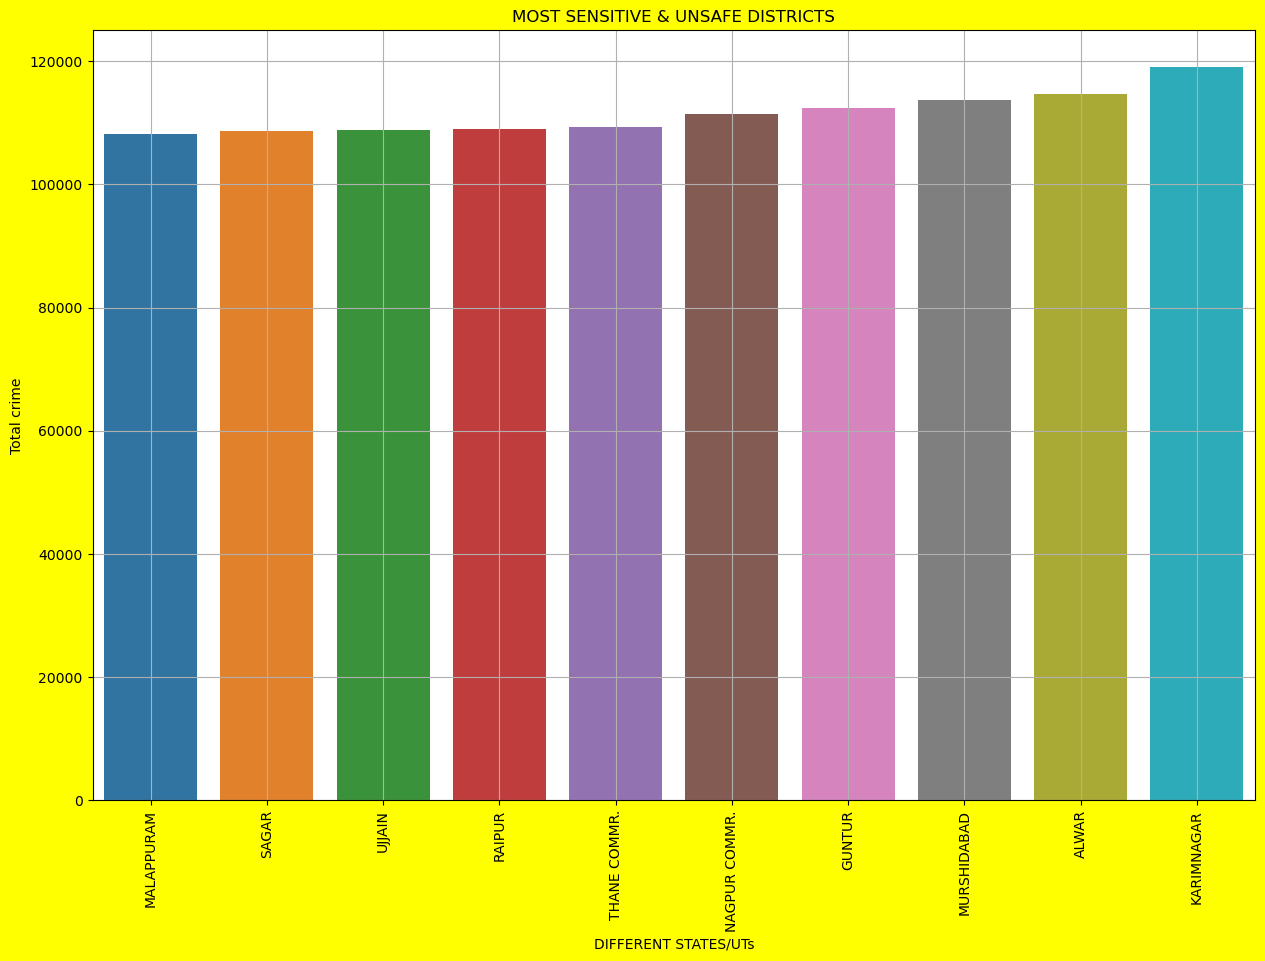

In [187]:
plt.figure(figsize=(15,10),facecolor='Yellow')
sns.barplot(x=sensative_districts['DISTRICT'],y=sensative_districts['Total crime'])
plt.xticks(rotation=90)
plt.xlabel("DIFFERENT STATES/UTs")
plt.title("MOST SENSITIVE & UNSAFE DISTRICTS")
plt.grid()
plt.show()

# 

# 4.2 What needs to be done to reduce crime-

1. The first thing that we can do is with our analysis in phase-2 like in which state, which crime is mostly happening we can 
analyse that and we can put more police forces to that particular state and particular area in the state.
so that we way we can control the quantum of the crimes which is happening mostly in the paricular state or the district.

2. Raise public awareness: We can ask the localities of that particular state to take more precautions as the particular crimes is happening mostly in 
the state/district

Steps the Government can take to prevent the crimes-

The government has since long been trying to reduce crimes and is taking measure to placate crimes which range from petty 
thievery to major frauds and kidnappings to homicide. Our government is trying its best to ensure the safety of the Indian 
Social Structure as a whole and is implementing various instruments and legislations to placate the Crime and its effect.  
Hereunder are a few methods the government can implement to reduce crimes:

1. With advancements in the field of Criminology, we have tools to gather scientific evidence to focus on hotspots or habitual 
offenders such that we can prevent or reduce violence.

2. The focus of the executives should be on preventing the conditions that lead people to criminality which ultimately leads to 
the commission of offences. This can be done through a systematic, integrated, coordinated approach where the punitive approach 
should be made the last resort.


3. In the modern era, Cyberspace has become the domain for violence. Crimes on cyberspace range from videos showing 
assassinations, to recruitments made for extremist groups and coercion to frauds. It is important to understand here that the 
Criminality has proliferated even to the web and it is high time now to take some strict actions against the same.

4. The governments should try to create a system based on an equilibrium state between repression or prevention and 
incorporate rehabilitation policies which would greatly affect the mentality of people and thereby dilute Criminality present 
in the minds of people.

5. Most importantly laws should be made in such a way that Crimes could be prevented at an early stage thereby rooting out the 
very Criminality which leads to the Crime.

# Overall analysis of capstone project-

In [220]:
df=pd.read_csv(r'C:\Users\prate\Downloads\data description (1).csv')
df

,STATE/UT,YEAR,Population,LITERACY RATE % Average,LITERACY RATE % Male,LITERACY RATE % Female,AREA OF STATE(km2),Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,...,Unnamed: 16314,Unnamed: 16315,Unnamed: 16316,Unnamed: 16317,Unnamed: 16318,Unnamed: 16319,Unnamed: 16320,Unnamed: 16321,Unnamed: 16322,Unnamed: 16323
0,A & N ISLANDS,2001,356152.0,81.30,86.30,75.20,8249.0,120024,0,1787226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A & N ISLANDS,2002,362527.0,81.80,86.60,76.30,8249.0,147942,300012,1903143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A & N ISLANDS,2003,368835.0,82.30,86.90,77.40,8249.0,1037802,642024,4175551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A & N ISLANDS,2004,375068.0,82.80,87.20,78.50,8249.0,124017,0,3625549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A & N ISLANDS,2005,381145.0,83.30,87.50,79.60,8249.0,134545,0,16296305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,89677560.0,73.96,79.82,66.68,88752.0,73687400,200382972,1426930028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,WEST BENGAL,2009,90933045.0,74.72,80.22,67.69,88752.0,119421964,254359760,1132538877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,WEST BENGAL,2010,92197015.0,75.48,80.62,68.70,88752.0,103394147,469496212,5323750464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,WEST BENGAL,2011,93460114.0,76.24,81.69,70.54,88752.0,94411216,484987582,5673832699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here in this data frame i have imported the major crimes happening in india for the analysis-

In [221]:
#This is showing some nan values will drop nan values-

In [222]:
df=df.dropna(axis=1)

In [223]:
df

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,A & N ISLANDS,2001,356152.0,86.30,75.20,120024,0,1787226,3966324,12,...,2,0,236,2,0,646,0,8,2,5874603
1,A & N ISLANDS,2002,362527.0,86.60,76.30,147942,300012,1903143,1476014,11,...,2,0,194,2,0,656,0,4,6,3828106
2,A & N ISLANDS,2003,368835.0,86.90,77.40,1037802,642024,4175551,3204559,14,...,2,0,220,0,0,636,0,16,4,9060958
3,A & N ISLANDS,2004,375068.0,87.20,78.50,124017,0,3625549,6418301,17,...,2,0,210,2,0,774,0,18,6,10169024
4,A & N ISLANDS,2005,381145.0,87.50,79.60,134545,0,16296305,10255649,11,...,2,0,158,2,0,724,0,12,2,26687514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,89677560.0,79.82,66.68,73687400,200382972,1426930028,79187738,11261,...,24,4,18066,14,20,76354,15,300,188,1780331202
416,WEST BENGAL,2009,90933045.0,80.22,67.69,119421964,254359760,1132538877,53739874,13213,...,24,8,22392,14,12,77552,15,688,216,1560215779
417,WEST BENGAL,2010,92197015.0,80.62,68.70,103394147,469496212,5323750464,71553286,16170,...,24,4,25528,44,68,98192,24,664,326,5968377631
418,WEST BENGAL,2011,93460114.0,81.69,70.54,94411216,484987582,5673832699,72435359,20878,...,25,14,26188,34,28,113228,0,826,400,6325868834


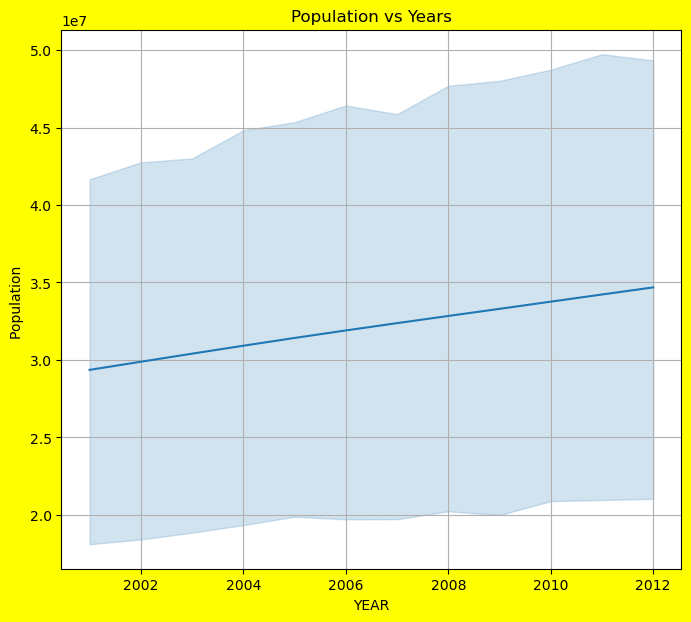

In [226]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df['YEAR'],y=df['Population '])
plt.title('Population vs Years')
plt.grid()
plt.show()

A gradual increase in the population over the years can be seen.

In [227]:
df

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,A & N ISLANDS,2001,356152.0,86.30,75.20,120024,0,1787226,3966324,12,...,2,0,236,2,0,646,0,8,2,5874603
1,A & N ISLANDS,2002,362527.0,86.60,76.30,147942,300012,1903143,1476014,11,...,2,0,194,2,0,656,0,4,6,3828106
2,A & N ISLANDS,2003,368835.0,86.90,77.40,1037802,642024,4175551,3204559,14,...,2,0,220,0,0,636,0,16,4,9060958
3,A & N ISLANDS,2004,375068.0,87.20,78.50,124017,0,3625549,6418301,17,...,2,0,210,2,0,774,0,18,6,10169024
4,A & N ISLANDS,2005,381145.0,87.50,79.60,134545,0,16296305,10255649,11,...,2,0,158,2,0,724,0,12,2,26687514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,89677560.0,79.82,66.68,73687400,200382972,1426930028,79187738,11261,...,24,4,18066,14,20,76354,15,300,188,1780331202
416,WEST BENGAL,2009,90933045.0,80.22,67.69,119421964,254359760,1132538877,53739874,13213,...,24,8,22392,14,12,77552,15,688,216,1560215779
417,WEST BENGAL,2010,92197015.0,80.62,68.70,103394147,469496212,5323750464,71553286,16170,...,24,4,25528,44,68,98192,24,664,326,5968377631
418,WEST BENGAL,2011,93460114.0,81.69,70.54,94411216,484987582,5673832699,72435359,20878,...,25,14,26188,34,28,113228,0,826,400,6325868834


In [233]:
df1=df.groupby('YEAR').sum().reset_index()
df1

,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,Sum of Dowry Deaths,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,2001,1.027606e+09,2711.45,2083.77,2534109086,3647522554,18662379985,7510736104,107173,20666,...,682,10606,542974,5464,24402,1402724,342,21992,19492,32357360974
1,2002,1.046000e+09,2732.70,2123.19,2387857805,11160534924,17553832788,6208652666,104258,20601,...,685,10558,530050,6248,28766,1460594,228,24400,20310,37313524379
2,2003,1.064201e+09,2753.95,2162.61,2049196018,3236502362,17775676530,6426692164,95356,18754,...,693,9518,522888,5601,22800,1400824,138,19214,24650,29490586235
3,2004,1.082186e+09,2775.20,2202.03,2829235651,2832562480,15202582744,4914132704,111126,21204,...,695,9182,553736,5316,22870,1482052,267,17762,20002,25781181743
4,2005,1.099717e+09,2796.45,2241.45,2614997591,3521785038,24721500495,8504411881,109543,20475,...,699,9228,541722,5022,22154,1483954,448,17398,19968,39365341795
5,2006,1.116653e+09,2817.70,2280.87,2074517061,2814769746,20197350659,6498050130,115886,22991,...,706,9200,529496,5207,23619,1559394,201,17504,19932,31587416248
6,2007,1.133179e+09,2838.95,2320.29,2271693236,4314892206,22537654698,7437420361,133378,24417,...,709,9338,546134,5256,26980,1658412,183,18632,21900,36564548389
7,2008,1.149384e+09,2860.20,2359.71,4942239194,5044673676,30830480941,10036377975,146973,24645,...,726,9822,569938,5710,29290,1713926,201,19038,24428,50856783506
8,2009,1.165475e+09,2881.45,2399.13,4568527730,4787776240,28624791596,9864572559,164722,25290,...,732,10074,558428,5764,30182,1731082,144,17916,22018,47848691553
9,2010,1.181675e+09,2902.70,2438.55,6236754114,33019308722,36088395838,9746890322,187197,25316,...,744,10522,578044,5854,30078,1848144,108,17382,19922,85094548132


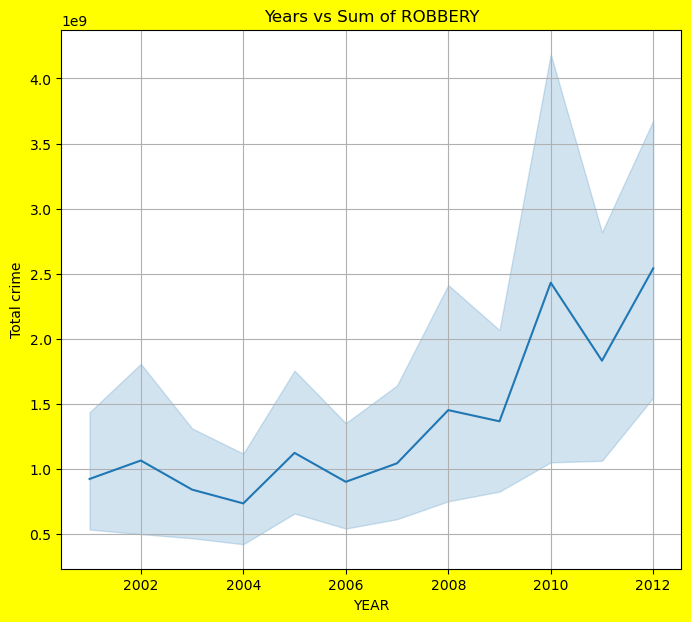

In [230]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df['YEAR'],y=df['Total crime'])
plt.title('Years vs Sum of ROBBERY')
plt.grid()
plt.show()

In [234]:
list=df1['Total crime'].to_list()
list

[32357360974,
 37313524379,
 29490586235,
 25781181743,
 39365341795,
 31587416248,
 36564548389,
 50856783506,
 47848691553,
 85094548132,
 64139087597,
 88952883332]

In [246]:
df1['Total crime'].sum()

569351953883

# Percentage increase in crime from 2001 to 2012.

In [263]:
per_inc=round((list[11]-list[0])/list[0]*100,2)
per_inc

53.38

1. India is a diverse country with a population of over 1.38 billion people, and crime is a significant issue that affects its 
citizens. According to the data available from the National Crime Records Bureau (NCRB) for the year 2011,in India The total crime has been increased to 53% from year 2001 to 2012.

In [252]:
df['Sum of Rape'].sum()

1257685

In [255]:
list=df1['Sum of Rape'].to_list()
list

[85216,
 86809,
 83698,
 95857,
 96776,
 101904,
 108944,
 112603,
 112064,
 116091,
 127016,
 130707]

In [262]:
per_inc=round((list[11]-list[0])/list[0]*100,2)
per_inc

53.38

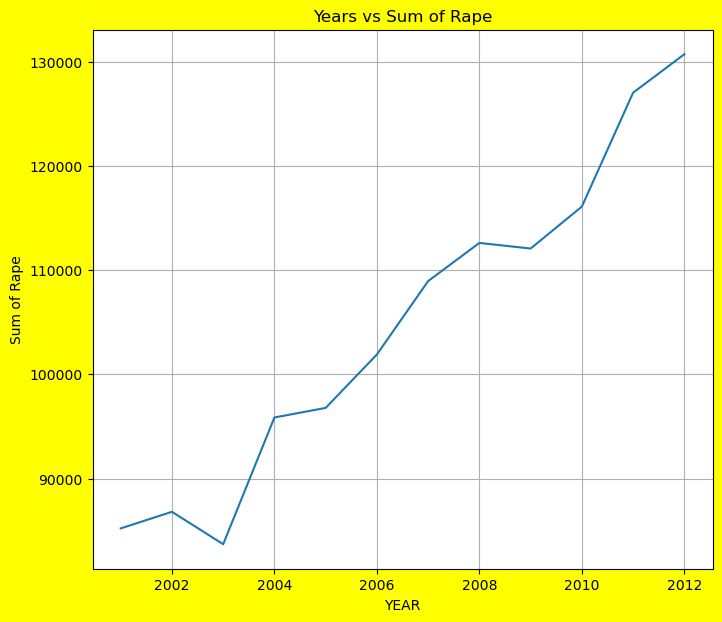

In [258]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of Rape'])
plt.title('Years vs Sum of Rape')
plt.grid()
plt.show()

2. So here we can see that the sum of rape or the voilance against the womens are increasing over the years.
we can see that the rape has been increased upto 53% from 2001 to 2012which is very high astonishing figure. Government must deploy more forces or regulations to the local administrations to control the rape in the more sensative areas.

In [269]:
list=df1['Sum of THEFT'].to_list()
list

[18662379985,
 17553832788,
 17775676530,
 15202582744,
 24721500495,
 20197350659,
 22537654698,
 30830480941,
 28624791596,
 36088395838,
 39810588821,
 55563824960]

In [270]:
round((list[11]-list[0])/list[0]*100,2)

197.73

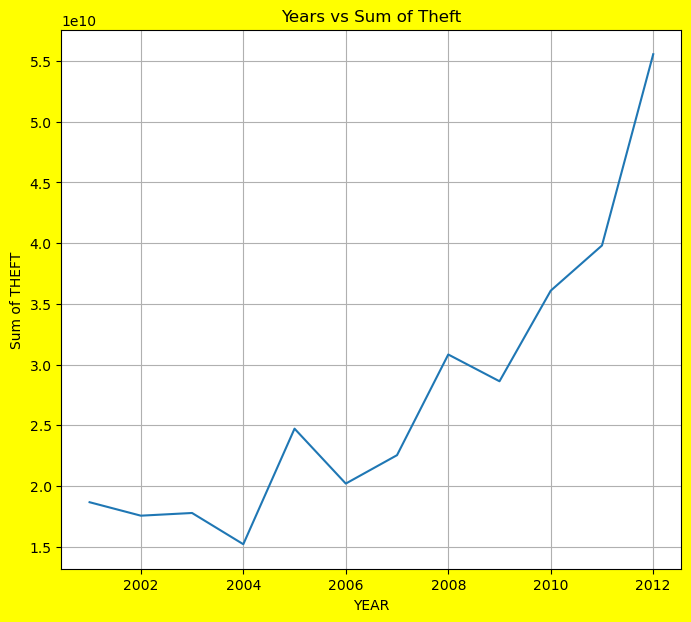

In [273]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of THEFT'])
plt.title('Years vs Sum of Theft')
plt.grid()
plt.show()

3. Here we can see that very high increase in theft crime from 2001 to 2012 i.e 197% which is very very high and an must be an eye 
opener for the government as the increase in the unemployablity & lake of education leads to increase in the high crimes related
to theft.

In [272]:
df1

,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,Sum of Dowry Deaths,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,2001,1.027606e+09,2711.45,2083.77,2534109086,3647522554,18662379985,7510736104,107173,20666,...,682,10606,542974,5464,24402,1402724,342,21992,19492,32357360974
1,2002,1.046000e+09,2732.70,2123.19,2387857805,11160534924,17553832788,6208652666,104258,20601,...,685,10558,530050,6248,28766,1460594,228,24400,20310,37313524379
2,2003,1.064201e+09,2753.95,2162.61,2049196018,3236502362,17775676530,6426692164,95356,18754,...,693,9518,522888,5601,22800,1400824,138,19214,24650,29490586235
3,2004,1.082186e+09,2775.20,2202.03,2829235651,2832562480,15202582744,4914132704,111126,21204,...,695,9182,553736,5316,22870,1482052,267,17762,20002,25781181743
4,2005,1.099717e+09,2796.45,2241.45,2614997591,3521785038,24721500495,8504411881,109543,20475,...,699,9228,541722,5022,22154,1483954,448,17398,19968,39365341795
5,2006,1.116653e+09,2817.70,2280.87,2074517061,2814769746,20197350659,6498050130,115886,22991,...,706,9200,529496,5207,23619,1559394,201,17504,19932,31587416248
6,2007,1.133179e+09,2838.95,2320.29,2271693236,4314892206,22537654698,7437420361,133378,24417,...,709,9338,546134,5256,26980,1658412,183,18632,21900,36564548389
7,2008,1.149384e+09,2860.20,2359.71,4942239194,5044673676,30830480941,10036377975,146973,24645,...,726,9822,569938,5710,29290,1713926,201,19038,24428,50856783506
8,2009,1.165475e+09,2881.45,2399.13,4568527730,4787776240,28624791596,9864572559,164722,25290,...,732,10074,558428,5764,30182,1731082,144,17916,22018,47848691553
9,2010,1.181675e+09,2902.70,2438.55,6236754114,33019308722,36088395838,9746890322,187197,25316,...,744,10522,578044,5854,30078,1848144,108,17382,19922,85094548132


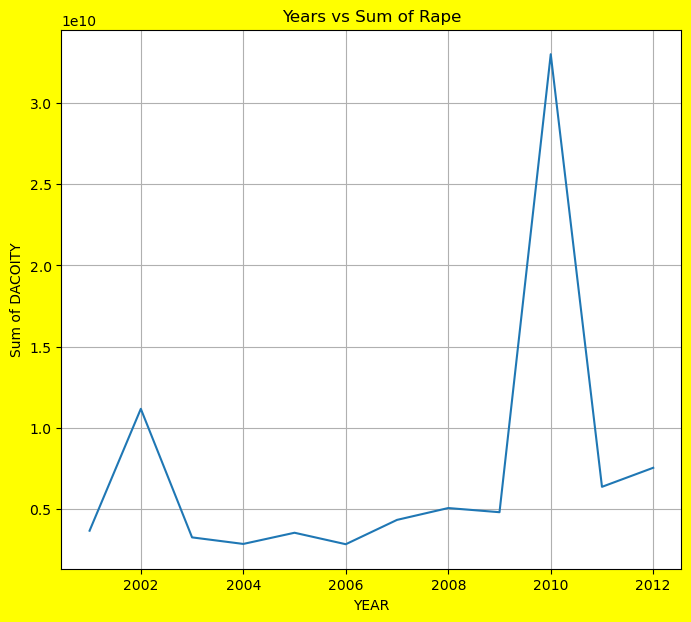

In [274]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of DACOITY'])
plt.title('Years vs Sum of Rape')
plt.grid()
plt.show()

In [277]:
list=df1['Sum of DACOITY'].to_list()
list

[3647522554,
 11160534924,
 3236502362,
 2832562480,
 3521785038,
 2814769746,
 4314892206,
 5044673676,
 4787776240,
 33019308722,
 6352913210,
 7527075724]

In [280]:
#Increase in dacoity crime from year 2009 to 2010-

In [278]:
round((list[9]-list[8])/list[8]*100,2)

589.66

In [281]:
#Increase in dacoity crime from year 2001 to 2012-

In [279]:
round((list[11]-list[0])/list[0]*100,2)

106.36

4. Here we can notice that a very high spike of 589% in the dacoity crime has been seen here from year 2009 to year 2010 but after 2010 year it has again reduced till 2011

In [282]:
df1

,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,Sum of Dowry Deaths,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,2001,1.027606e+09,2711.45,2083.77,2534109086,3647522554,18662379985,7510736104,107173,20666,...,682,10606,542974,5464,24402,1402724,342,21992,19492,32357360974
1,2002,1.046000e+09,2732.70,2123.19,2387857805,11160534924,17553832788,6208652666,104258,20601,...,685,10558,530050,6248,28766,1460594,228,24400,20310,37313524379
2,2003,1.064201e+09,2753.95,2162.61,2049196018,3236502362,17775676530,6426692164,95356,18754,...,693,9518,522888,5601,22800,1400824,138,19214,24650,29490586235
3,2004,1.082186e+09,2775.20,2202.03,2829235651,2832562480,15202582744,4914132704,111126,21204,...,695,9182,553736,5316,22870,1482052,267,17762,20002,25781181743
4,2005,1.099717e+09,2796.45,2241.45,2614997591,3521785038,24721500495,8504411881,109543,20475,...,699,9228,541722,5022,22154,1483954,448,17398,19968,39365341795
5,2006,1.116653e+09,2817.70,2280.87,2074517061,2814769746,20197350659,6498050130,115886,22991,...,706,9200,529496,5207,23619,1559394,201,17504,19932,31587416248
6,2007,1.133179e+09,2838.95,2320.29,2271693236,4314892206,22537654698,7437420361,133378,24417,...,709,9338,546134,5256,26980,1658412,183,18632,21900,36564548389
7,2008,1.149384e+09,2860.20,2359.71,4942239194,5044673676,30830480941,10036377975,146973,24645,...,726,9822,569938,5710,29290,1713926,201,19038,24428,50856783506
8,2009,1.165475e+09,2881.45,2399.13,4568527730,4787776240,28624791596,9864572559,164722,25290,...,732,10074,558428,5764,30182,1731082,144,17916,22018,47848691553
9,2010,1.181675e+09,2902.70,2438.55,6236754114,33019308722,36088395838,9746890322,187197,25316,...,744,10522,578044,5854,30078,1848144,108,17382,19922,85094548132


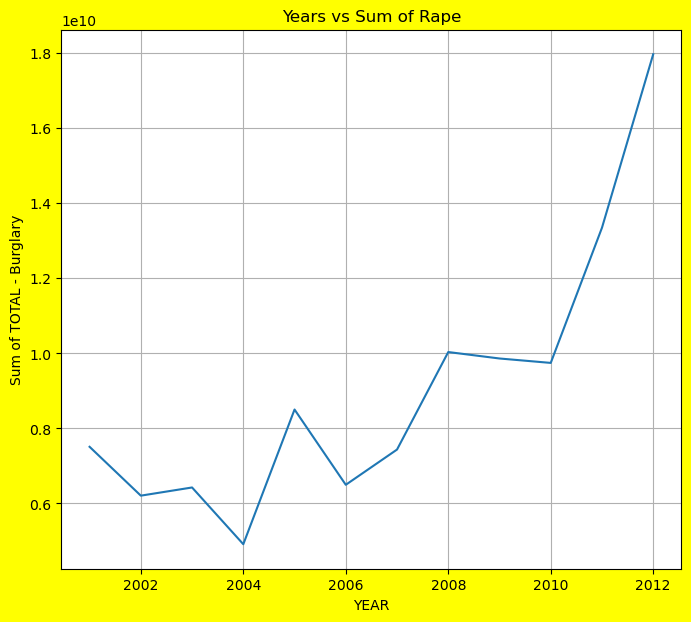

In [283]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of TOTAL - Burglary'])
plt.title('Years vs Sum of Rape')
plt.grid()
plt.show()

In [296]:
list=df1['Sum of TOTAL - Burglary'].to_list()
list

[7510736104,
 6208652666,
 6426692164,
 4914132704,
 8504411881,
 6498050130,
 7437420361,
 10036377975,
 9864572559,
 9746890322,
 13349985298,
 17974597444]

In [297]:
#Increase in Bulglary crime from year 2001 to 2012-

In [298]:
round((list[11]-list[0])/list[0]*100,2)

139.32

5. Here we can seethe total burglary crime has been increased to 139% from year 2001 to 2012.

In [299]:
df2=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of TOTAL - Burglary')
df2

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
26,PUDUCHERRY,24078,1.277929e+07,1079.36,932.38,30099943,37349614,408492834,149174406,818,...,19,10,21388,0,14,54980,0,380,568,625201975
31,TRIPURA,24078,4.196004e+07,1039.29,896.06,31654564,95778080,432295429,160462054,6720,...,55,174,18612,198,168,28088,0,1100,78,720272288
21,MANIPUR,24078,1.523990e+07,956.28,777.38,21417282,22455776,636629640,166294160,8416,...,113,2,6866,18,0,25474,0,1904,6,846856282
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
24,NAGALAND,24078,2.610087e+07,931.68,835.33,2122165970,57118266,1365677649,326229224,1803,...,126,88,1064,1397,60,6100,3,146,20,3871207810
22,MEGHALAYA,24078,3.041316e+07,856.08,796.21,58695553,283897288,1544289299,338156153,3266,...,84,0,3472,0,0,12528,12,886,16,2225070572


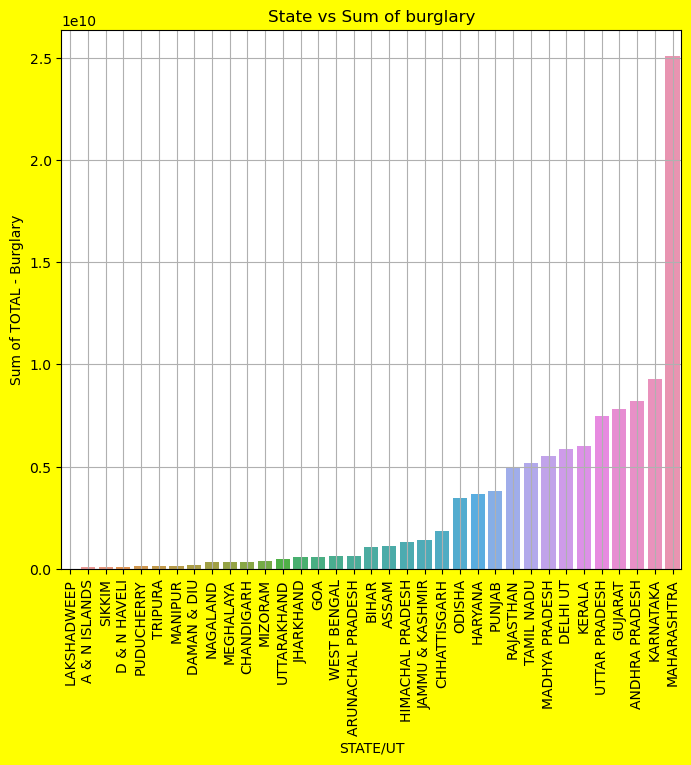

In [304]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df2['STATE/UT'],y=df2['Sum of TOTAL - Burglary'])
plt.title('State vs Sum of burglary')
plt.xticks(rotation=90)
plt.grid()
plt.show()

6. Here we can notice that maharashtra,Karnataka & andhra pradesh has the highest robbery crimes.

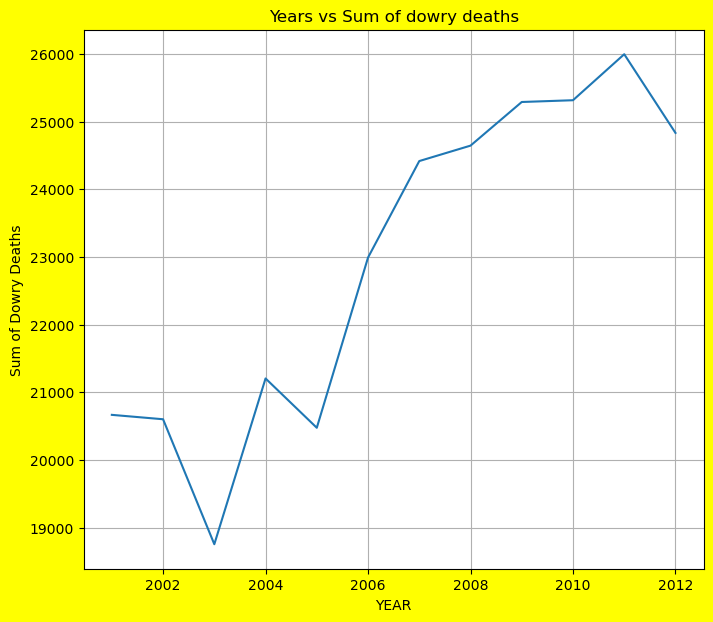

In [306]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of Dowry Deaths'])
plt.title('Years vs Sum of dowry deaths')
plt.grid()
plt.show()

Here we can see the trend the dowry deaths make over the years as we can see that dowry deaths has been increased from 2001 to 2012.

In [307]:
list=df1['Sum of Dowry Deaths'].to_list()
list

[20666,
 20601,
 18754,
 21204,
 20475,
 22991,
 24417,
 24645,
 25290,
 25316,
 25996,
 24833]

In [308]:
round((list[11]-list[0])/list[0]*100,2)

20.16

7. we can see the 20% increase in the dowry deaths over the years from 2001 to 2012.

In [309]:
df3=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of Dowry Deaths')
df3

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
24,NAGALAND,24078,2.610087e+07,931.68,835.33,2122165970,57118266,1365677649,326229224,1803,...,126,88,1064,1397,60,6100,3,146,20,3871207810
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
2,ARUNACHAL PRADESH,24078,1.440071e+07,819.86,610.40,71212746,1025077592,995545725,658625334,4271,...,183,404,10314,582,0,14792,0,508,36,2750501113
21,MANIPUR,24078,1.523990e+07,956.28,777.38,21417282,22455776,636629640,166294160,8416,...,113,2,6866,18,0,25474,0,1904,6,846856282
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
23,MIZORAM,24078,1.165432e+07,852.14,800.82,9900301,7525370,703895655,378034747,494,...,96,34,2432,0,0,11824,9,550,12,1099379698
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
22,MEGHALAYA,24078,3.041316e+07,856.08,796.21,58695553,283897288,1544289299,338156153,3266,...,84,0,3472,0,0,12528,12,886,16,2225070572


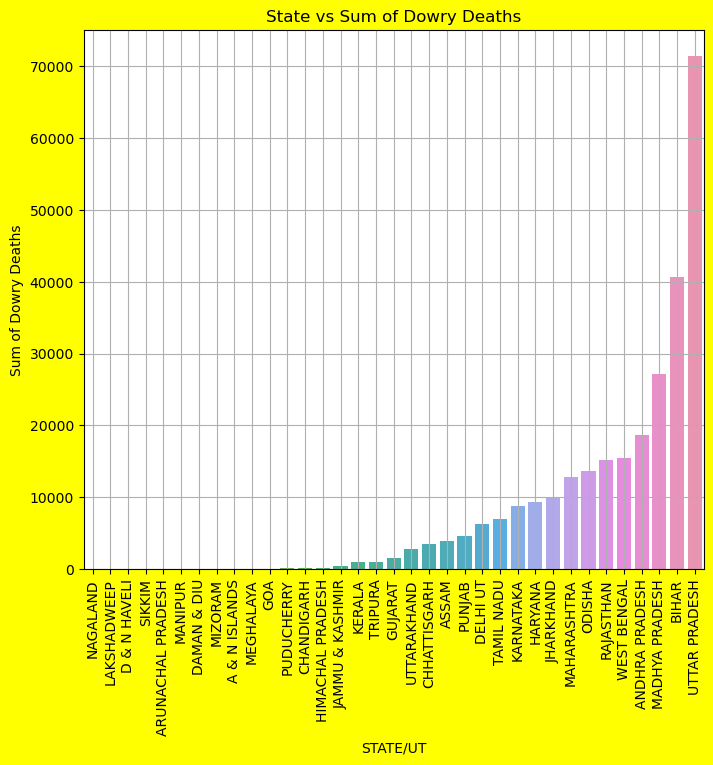

In [311]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df3['STATE/UT'],y=df3['Sum of Dowry Deaths'])
plt.title('State vs Sum of Dowry Deaths')
plt.xticks(rotation=90)
plt.grid()
plt.show()

8. Here we can see that UP BIHAR & MP has the high rates of the dowry deaths crime.

In [315]:
df1

,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,Sum of Dowry Deaths,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
0,2001,1.027606e+09,2711.45,2083.77,2534109086,3647522554,18662379985,7510736104,107173,20666,...,682,10606,542974,5464,24402,1402724,342,21992,19492,32357360974
1,2002,1.046000e+09,2732.70,2123.19,2387857805,11160534924,17553832788,6208652666,104258,20601,...,685,10558,530050,6248,28766,1460594,228,24400,20310,37313524379
2,2003,1.064201e+09,2753.95,2162.61,2049196018,3236502362,17775676530,6426692164,95356,18754,...,693,9518,522888,5601,22800,1400824,138,19214,24650,29490586235
3,2004,1.082186e+09,2775.20,2202.03,2829235651,2832562480,15202582744,4914132704,111126,21204,...,695,9182,553736,5316,22870,1482052,267,17762,20002,25781181743
4,2005,1.099717e+09,2796.45,2241.45,2614997591,3521785038,24721500495,8504411881,109543,20475,...,699,9228,541722,5022,22154,1483954,448,17398,19968,39365341795
5,2006,1.116653e+09,2817.70,2280.87,2074517061,2814769746,20197350659,6498050130,115886,22991,...,706,9200,529496,5207,23619,1559394,201,17504,19932,31587416248
6,2007,1.133179e+09,2838.95,2320.29,2271693236,4314892206,22537654698,7437420361,133378,24417,...,709,9338,546134,5256,26980,1658412,183,18632,21900,36564548389
7,2008,1.149384e+09,2860.20,2359.71,4942239194,5044673676,30830480941,10036377975,146973,24645,...,726,9822,569938,5710,29290,1713926,201,19038,24428,50856783506
8,2009,1.165475e+09,2881.45,2399.13,4568527730,4787776240,28624791596,9864572559,164722,25290,...,732,10074,558428,5764,30182,1731082,144,17916,22018,47848691553
9,2010,1.181675e+09,2902.70,2438.55,6236754114,33019308722,36088395838,9746890322,187197,25316,...,744,10522,578044,5854,30078,1848144,108,17382,19922,85094548132


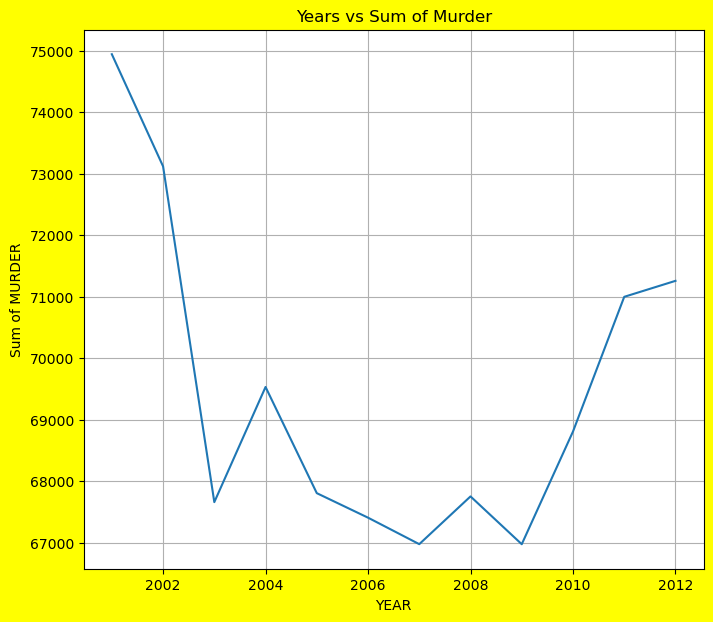

In [317]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of MURDER'])
plt.title('Years vs Sum of Murder')
plt.grid()
plt.show()

9. Here we can see that the count of murder cases has been decreased from 2001 to 2003 but increased again after 2003 year.

In [318]:
list=df1['Sum of MURDER'].to_list()
list

[74946,
 73121,
 67657,
 69531,
 67803,
 67404,
 66973,
 67750,
 66972,
 68806,
 70998,
 71258]

In [319]:
round((list[11]-list[0])/list[0]*100,2)

-4.92

Murders has been decreased from 2001 to 2012 with almost 5%.

In [313]:
df3=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of MURDER')
df3

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
5,CHANDIGARH,24078,1.181253e+07,1059.14,946.09,32343616,484611890,2020549822,351440424,3106,...,12,0,1632,0,6,23210,0,124,286,2888979173
26,PUDUCHERRY,24078,1.277929e+07,1079.36,932.38,30099943,37349614,408492834,149174406,818,...,19,10,21388,0,14,54980,0,380,568,625201975
23,MIZORAM,24078,1.165432e+07,852.14,800.82,9900301,7525370,703895655,378034747,494,...,96,34,2432,0,0,11824,9,550,12,1099379698
10,GOA,24078,1.767572e+07,1087.95,963.97,99436399,99853250,1355848025,603134117,1132,...,24,2,4574,4,26,19896,0,544,246,2158304444
2,ARUNACHAL PRADESH,24078,1.440071e+07,819.86,610.40,71212746,1025077592,995545725,658625334,4271,...,183,404,10314,582,0,14792,0,508,36,2750501113


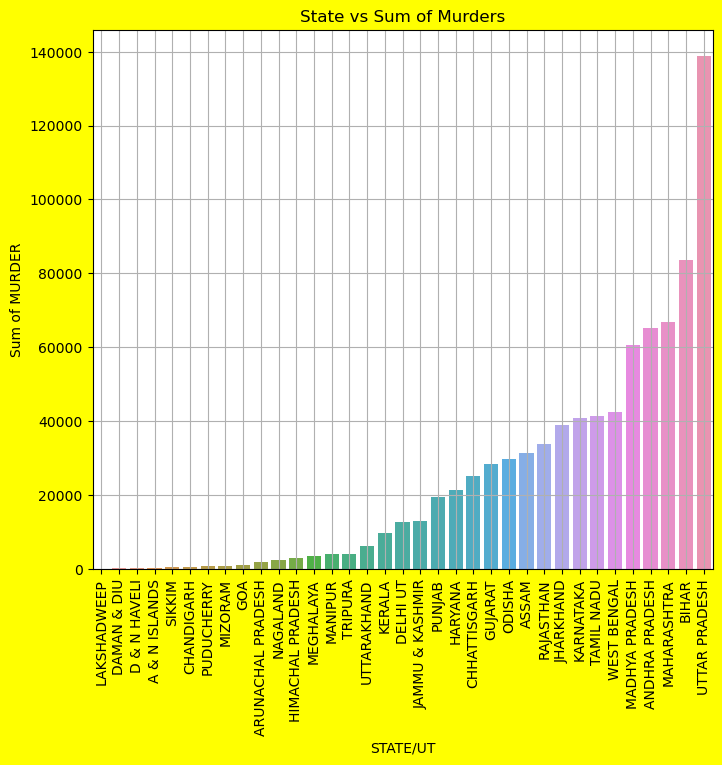

In [316]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df3['STATE/UT'],y=df3['Sum of MURDER'])
plt.title('State vs Sum of Murders')
plt.xticks(rotation=90)
plt.grid()
plt.show()

10. UP BIHAR & MAHARASHTRA has the highest rate of murder crime.

In [320]:
df1.columns

Index(['YEAR', 'Population ', 'LITERACY RATE % Male ',
       'LITERACY RATE  % Female', 'Sum of ROBBERY', 'Sum of DACOITY',
       'Sum of THEFT', 'Sum of TOTAL - Burglary',
       'Sum of Kidnapping and Abduction', 'Sum of Dowry Deaths', 'Sum of Rape',
       'Sum of MURDER', 'Sum of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'Sum of COUNTERFIETING',
       'Count of buying & Selling of girls for prostitution',
       'Count of Abetment of suicide', 'Count of Procuration of minor girls',
       'Sum of RIOTS', 'Sum of ATTEMPT TO MURDER',
       'Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'Count of Foeticide', 'Sum of Hurt', 'Sum of HURT/GREVIOUS HURT',
       'Sum of Other Crimes Against STs', 'Sum of Other Crimes Against SCs',
       'Sum of OTHER IPC CRIMES', 'Sum of Importation of Girls2',
       'Sum of Arson', 'Sum of INSULT TO MODESTY OF WOMEN', 'Total crime'],
      dtype='object')

In [321]:
df3=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of Kidnapping and Abduction')
df3

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
23,MIZORAM,24078,1.165432e+07,852.14,800.82,9900301,7525370,703895655,378034747,494,...,96,34,2432,0,0,11824,9,550,12,1099379698
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
26,PUDUCHERRY,24078,1.277929e+07,1079.36,932.38,30099943,37349614,408492834,149174406,818,...,19,10,21388,0,14,54980,0,380,568,625201975
10,GOA,24078,1.767572e+07,1087.95,963.97,99436399,99853250,1355848025,603134117,1132,...,24,2,4574,4,26,19896,0,544,246,2158304444
24,NAGALAND,24078,2.610087e+07,931.68,835.33,2122165970,57118266,1365677649,326229224,1803,...,126,88,1064,1397,60,6100,3,146,20,3871207810
5,CHANDIGARH,24078,1.181253e+07,1059.14,946.09,32343616,484611890,2020549822,351440424,3106,...,12,0,1632,0,6,23210,0,124,286,2888979173


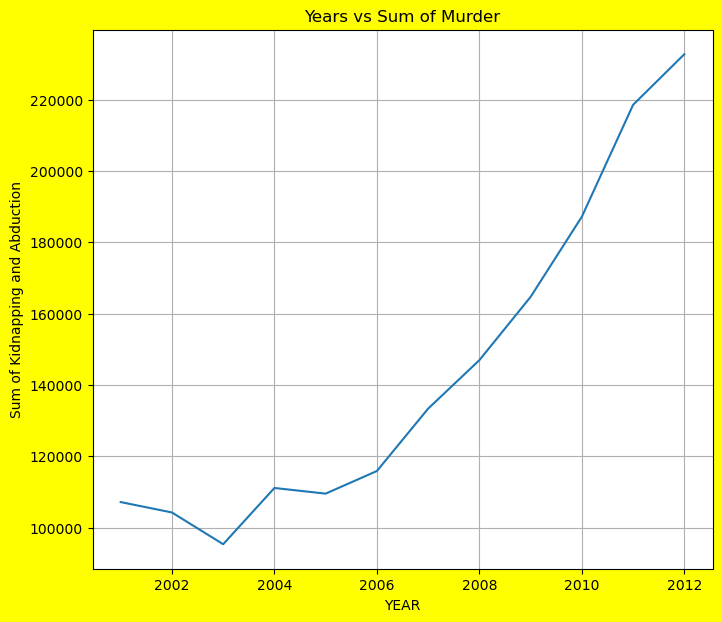

In [326]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of Kidnapping and Abduction'])
plt.title('Years vs Sum of Murder')
plt.grid()
plt.show()

11. Here we can notice the growth of kidnapping & abduction crime over the years.

In [323]:
list=df1['Sum of Kidnapping and Abduction'].to_list()
list

[107173,
 104258,
 95356,
 111126,
 109543,
 115886,
 133378,
 146973,
 164722,
 187197,
 218568,
 232752]

In [324]:
round((list[11]-list[0])/list[0]*100,2)

117.17

12. So here it can be noticed that kidnapping & abduction crime has been increased to 117% from 2001 to 2012


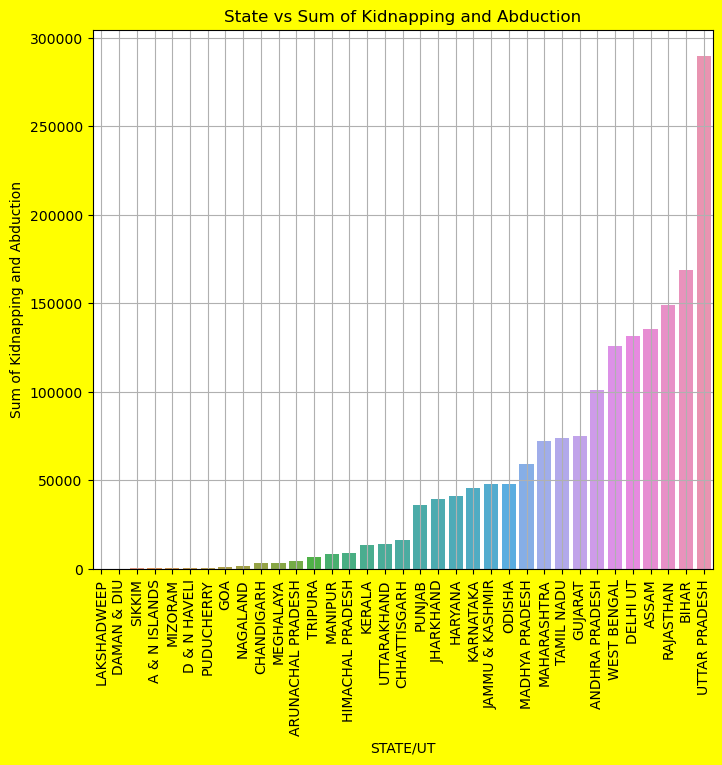

In [325]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df3['STATE/UT'],y=df3['Sum of Kidnapping and Abduction'])
plt.title('State vs Sum of Kidnapping and Abduction')
plt.xticks(rotation=90)
plt.grid()
plt.show()

13. UP BIHAR & RAJSTHAN has the highest rate of kidnapping & abduction crime.

In [327]:
df1.columns

Index(['YEAR', 'Population ', 'LITERACY RATE % Male ',
       'LITERACY RATE  % Female', 'Sum of ROBBERY', 'Sum of DACOITY',
       'Sum of THEFT', 'Sum of TOTAL - Burglary',
       'Sum of Kidnapping and Abduction', 'Sum of Dowry Deaths', 'Sum of Rape',
       'Sum of MURDER', 'Sum of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'Sum of COUNTERFIETING',
       'Count of buying & Selling of girls for prostitution',
       'Count of Abetment of suicide', 'Count of Procuration of minor girls',
       'Sum of RIOTS', 'Sum of ATTEMPT TO MURDER',
       'Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'Count of Foeticide', 'Sum of Hurt', 'Sum of HURT/GREVIOUS HURT',
       'Sum of Other Crimes Against STs', 'Sum of Other Crimes Against SCs',
       'Sum of OTHER IPC CRIMES', 'Sum of Importation of Girls2',
       'Sum of Arson', 'Sum of INSULT TO MODESTY OF WOMEN', 'Total crime'],
      dtype='object')

In [328]:
df3=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY')
df3

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
24,NAGALAND,24078,2.610087e+07,931.68,835.33,2122165970,57118266,1365677649,326229224,1803,...,126,88,1064,1397,60,6100,3,146,20,3871207810
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
5,CHANDIGARH,24078,1.181253e+07,1059.14,946.09,32343616,484611890,2020549822,351440424,3106,...,12,0,1632,0,6,23210,0,124,286,2888979173
10,GOA,24078,1.767572e+07,1087.95,963.97,99436399,99853250,1355848025,603134117,1132,...,24,2,4574,4,26,19896,0,544,246,2158304444
21,MANIPUR,24078,1.523990e+07,956.28,777.38,21417282,22455776,636629640,166294160,8416,...,113,2,6866,18,0,25474,0,1904,6,846856282
22,MEGHALAYA,24078,3.041316e+07,856.08,796.21,58695553,283897288,1544289299,338156153,3266,...,84,0,3472,0,0,12528,12,886,16,2225070572


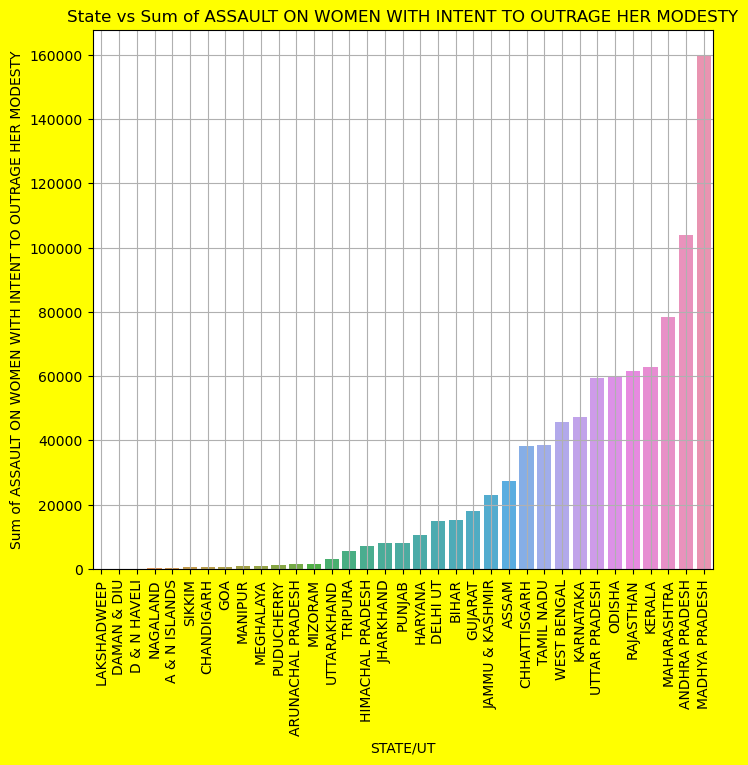

In [329]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df3['STATE/UT'],y=df3['Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'])
plt.title('State vs Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY')
plt.xticks(rotation=90)
plt.grid()
plt.show()

14. MP Andhra pradesh and maharshtra has the highest rate of assault of women crime.

Assault on women has been increased from year 2001 to 2012 

In [332]:
list=df1['Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'].to_list()
list

[68248,
 67886,
 65878,
 69134,
 68350,
 73234,
 77468,
 80826,
 77422,
 81226,
 85936,
 90702]

In [333]:
round((list[11]-list[0])/list[0]*100,2)

32.9

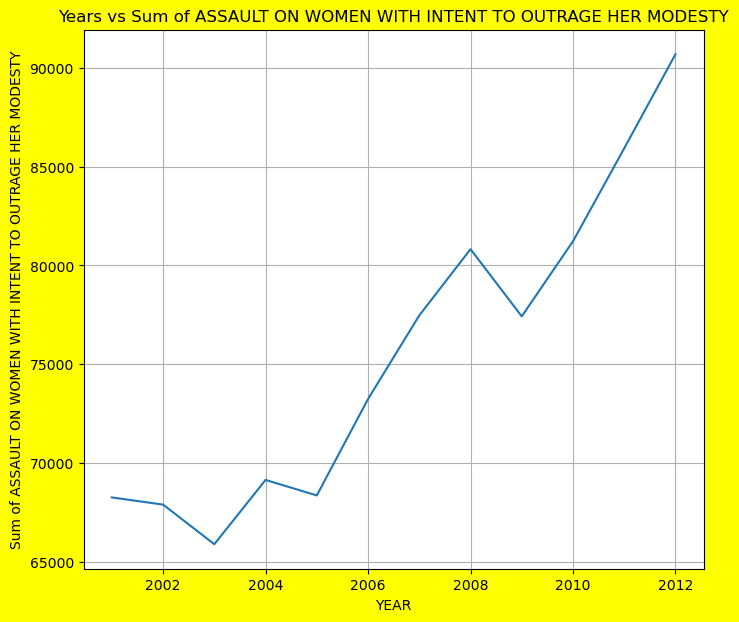

In [335]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'])
plt.title('Years vs Sum of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY')
plt.grid()
plt.show()

15. Here we can see that the assualt on the women crime has been increased from year 2001 to 2012 by 33%.

In [337]:
list=df1['Sum of RIOTS'].to_list()
list

[152444,
 137890,
 114668,
 119942,
 112470,
 113282,
 119830,
 132036,
 125884,
 135142,
 137000,
 149266]

In [338]:
round((list[11]-list[0])/list[0]*100,2)

-2.08

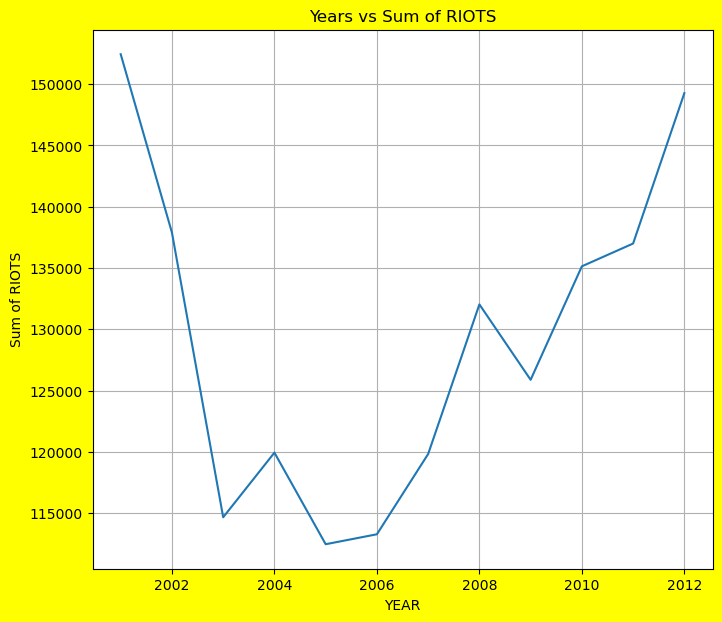

In [339]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.lineplot(x=df1['YEAR'],y=df1['Sum of RIOTS'])
plt.title('Years vs Sum of RIOTS')
plt.grid()
plt.show()

16. Here we can notice that the overall riots has been readuced from 2001 to 2012 by 2%.
In year 2006 we saw the lowest crimes happened in india

In [340]:
df3=df.groupby('STATE/UT').sum().reset_index().sort_values(by='Sum of RIOTS')
df3

,STATE/UT,YEAR,Population,LITERACY RATE % Male,LITERACY RATE % Female,Sum of ROBBERY,Sum of DACOITY,Sum of THEFT,Sum of TOTAL - Burglary,Sum of Kidnapping and Abduction,...,Count of Foeticide,Sum of Hurt,Sum of HURT/GREVIOUS HURT,Sum of Other Crimes Against STs,Sum of Other Crimes Against SCs,Sum of OTHER IPC CRIMES,Sum of Importation of Girls2,Sum of Arson,Sum of INSULT TO MODESTY OF WOMEN,Total crime
27,PUNJAB,24078,3.194873e+08,936.35,806.94,908886118,854888686,8147497669,3818915402,36199,...,302,268,113840,0,1004,232054,6,1814,1524,13730661469
23,MIZORAM,24078,1.165432e+07,852.14,800.82,9900301,7525370,703895655,378034747,494,...,96,34,2432,0,0,11824,9,550,12,1099379698
24,NAGALAND,24078,2.610087e+07,931.68,835.33,2122165970,57118266,1365677649,326229224,1803,...,126,88,1064,1397,60,6100,3,146,20,3871207810
0,A & N ISLANDS,24078,4.671211e+06,1057.90,974.90,3704206,8938766,96892540,82882050,479,...,24,2,2210,58,0,8886,0,196,86,192431438
22,MEGHALAYA,24078,3.041316e+07,856.08,796.21,58695553,283897288,1544289299,338156153,3266,...,84,0,3472,0,0,12528,12,886,16,2225070572
18,LAKSHADWEEP,24078,7.954720e+05,1130.56,1012.26,0,2000034,3740040,2227962,17,...,12,0,114,0,0,654,0,44,0,7969324
29,SIKKIM,24078,7.093681e+06,983.56,827.83,10421793,2658082,93698425,83479882,442,...,48,204,1878,58,36,4074,0,172,28,190268127
7,D & N HAVELI,24078,2.885471e+06,950.47,640.63,8635414,40463852,263909172,118325157,688,...,12,6,636,96,10,3718,0,110,8,431340176
8,DAMAN & DIU,24078,2.072292e+06,1073.74,875.16,21043691,58184340,119310982,185107832,163,...,24,0,380,4,10,1322,0,68,4,383649917
2,ARUNACHAL PRADESH,24078,1.440071e+07,819.86,610.40,71212746,1025077592,995545725,658625334,4271,...,183,404,10314,582,0,14792,0,508,36,2750501113


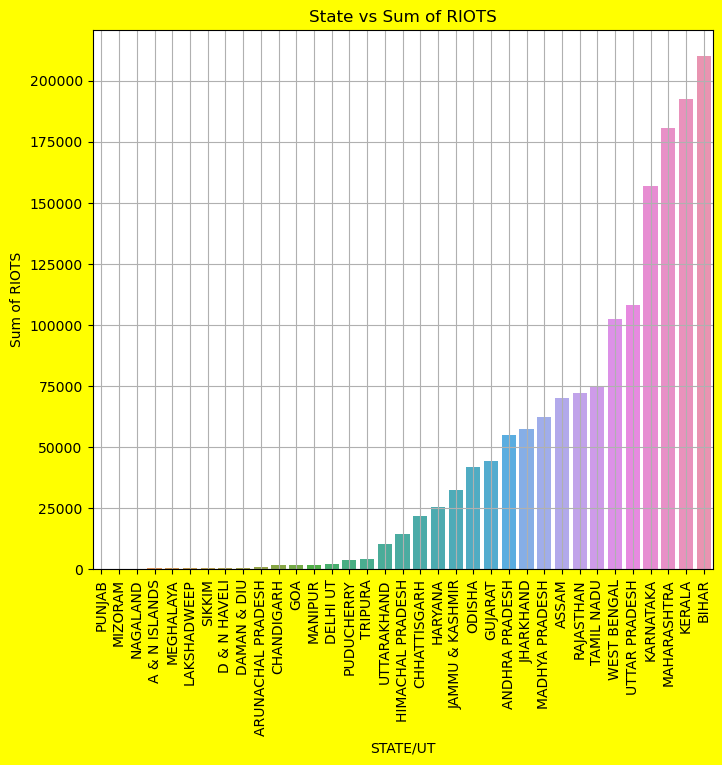

In [341]:
plt.figure(figsize=(8,7),facecolor='yellow')
sns.barplot(x=df3['STATE/UT'],y=df3['Sum of RIOTS'])
plt.title('State vs Sum of RIOTS')
plt.xticks(rotation=90)
plt.grid()
plt.show()

BIHAR,KERALA & MAHARASHTRA has been the states where the highest crime has been happened.